#### We will be exploring various visualizations from a simple histogram to parallel coordinates chart and even compute the correlation matrix using the wheat seeds data set which is generated by recording X-Ray measurements of various wheat kernels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import andrews_curves

# Look pretty...
# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
#
# Loading up the Seeds Dataset into a Dataframe
#
df = pd.read_csv("C:\\Users\\prabhakar\\Desktop\\All Code Backup\\Python\\DAT210x\\DAT210x-master\\3_Data Visualization\\Datasets\\wheat.data", sep=',', header=0)
print(df.head(2))

print(df.describe())

   id   area  perimeter  compactness  length  width  asymmetry  groove  \
0   0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220   
1   1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956   

  wheat_type  
0       kama  
1       kama  
               id        area   perimeter  compactness      length  \
count  210.000000  210.000000  210.000000   207.000000  210.000000   
mean   104.500000   14.847524   14.559286     0.871280    5.563918   
std     60.765944    2.909699    1.305959     0.023306    0.719594   
min      0.000000   10.590000   12.410000     0.808100    0.818900   
25%     52.250000   12.270000   13.450000     0.857700    5.244750   
50%    104.500000   14.355000   14.320000     0.873500    5.518000   
75%    156.750000   17.305000   15.715000     0.887650    5.979750   
max    209.000000   21.180000   17.250000     0.918300    6.675000   

            width   asymmetry      groove  
count  209.000000  210.000000  206.000000  
mean     3.28

# Creating histograms from the slices of the dataframe

In [3]:
#
# Creating a slice of the dataframe 
#
s1 = df.ix[:,['area','perimeter']]
print(s1.head(2))

#
# Creating another slice of the dataframe
s2 = df[['groove','asymmetry']]
print(s2.head(2))

    area  perimeter
0  15.26      14.84
1  14.88      14.57
   groove  asymmetry
0   5.220      2.221
1   4.956      1.018


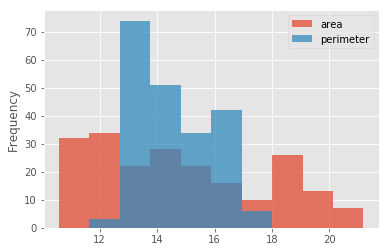

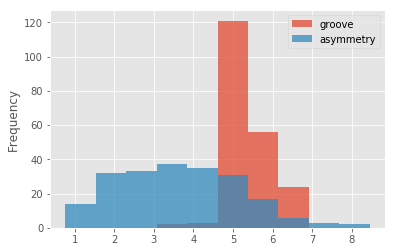

In [4]:
#
# Creating a histogram plot using the first slice,
# and another histogram plot using the second slice.
# 
s1.plot.hist(alpha = 0.75)
s2.plot.hist(alpha = 0.75)

# Display the graphs:
plt.show()

# Creating 2D scatter plots with different attributes of the dataframe

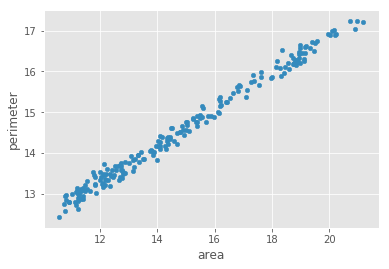

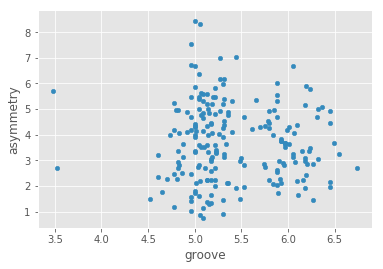

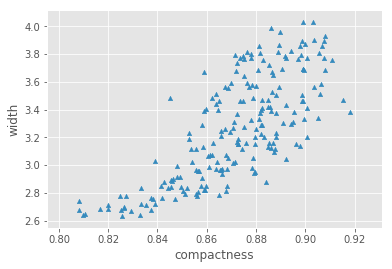

In [5]:
#
# Creating a 2d scatter plot that graphs the
# area and perimeter features
df.plot.scatter(x='area',y='perimeter')

#
# Creating a 2d scatter plot that graphs the
# groove and asymmetry features
df.plot.scatter(x='groove',y='asymmetry')

#
# Creating a 2d scatter plot that graphs the
# compactness and width features
# 
df.plot.scatter(x='compactness',y='width',marker='^')

plt.show()

# Plotting 3D scatter plots using different features of the dataframe

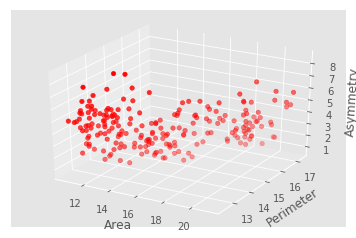

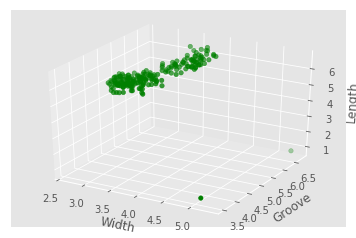

In [6]:
fig = plt.figure()

#
# Creating a new 3D subplot using fig. 
# Then use the subplot to graph a 3D scatter 
# plot using the area, perimeter and asymmetry features. 
#
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Asymmetry')
ax.scatter(df.area, df.perimeter, df.asymmetry, c='red')


fig = plt.figure()
#
# Creating a new 3D subplot using fig.
# Then use the subplot to graph a 3D scatter plot using the width,
# groove and length features. 
# 
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('Width')
ax.set_ylabel('Groove')
ax.set_zlabel('Length')
ax.scatter(df.width, df.groove, df.length, c='green')

plt.show()

# Plotting a parallel coordinates chart, grouped by the wheat_type feature

In [7]:
#
# Drop the 'id','area' and 'perimeter' features
df1 = df.drop(df.columns[[0,1,2]], axis = 1)
print(df1.head(2))

   compactness  length  width  asymmetry  groove wheat_type
0       0.8710   5.763  3.312      2.221   5.220       kama
1       0.8811   5.554  3.333      1.018   4.956       kama


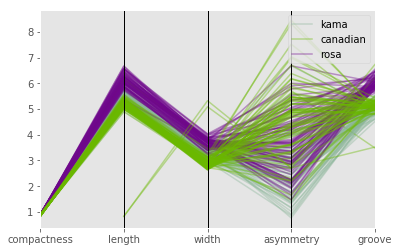

In [8]:
#
# Ploting a parallel coordinates chart grouped by
# the 'wheat_type' feature.
parallel_coordinates(df1,'wheat_type', alpha =.4)
plt.show()

# Plotting an Andrew's Curve chart, grouped by the wheat_type feature.

In [9]:
#
# Dropping the 'id', 'area' and 'perimeter' features
df2 = df.drop('id', axis = 1)
print(df.head(2))

   id   area  perimeter  compactness  length  width  asymmetry  groove  \
0   0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220   
1   1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956   

  wheat_type  
0       kama  
1       kama  


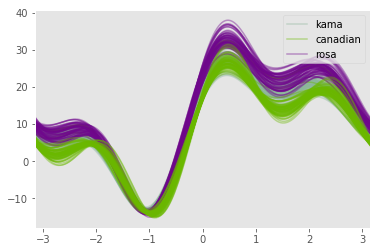

In [10]:
#
# Plotting a parallel coordinates chart grouped by
# the 'wheat_type' feature.
andrews_curves(df2,'wheat_type', alpha =0.4)

plt.show()

# Computing the correlation matrix of the dataframe and drawing a graph of the correlation matrix using imshow

In [11]:
#
# Computing the correlation matrix of your dataframe
print(df2.corr())

                 area  perimeter  compactness    length     width  asymmetry  \
area         1.000000   0.994341     0.600312  0.645418  0.801616  -0.205876   
perimeter    0.994341   1.000000     0.520544  0.657490  0.783188  -0.196360   
compactness  0.600312   0.520544     1.000000  0.360060  0.756165  -0.315668   
length       0.645418   0.657490     0.360060  1.000000  0.197228  -0.102325   
width        0.801616   0.783188     0.756165  0.197228  1.000000  -0.249378   
asymmetry   -0.205876  -0.196360    -0.315668 -0.102325 -0.249378   1.000000   
groove       0.786096   0.813256     0.236184  0.669887  0.619865  -0.039248   

               groove  
area         0.786096  
perimeter    0.813256  
compactness  0.236184  
length       0.669887  
width        0.619865  
asymmetry   -0.039248  
groove       1.000000  


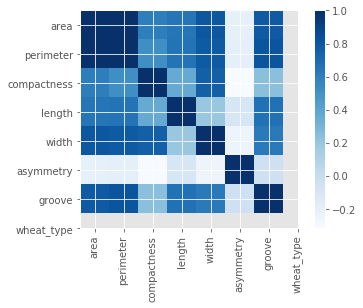

In [12]:
#
# Graphing the correlation matrix using imshow or matshow
# 
plt.imshow(df2.corr(), cmap = plt.cm.Blues, interpolation = 'nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df2.columns))]

plt.xticks(tick_marks, df2.columns, rotation = 'vertical')
plt.yticks(tick_marks, df2.columns)

plt.show()